<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-I-Figols/blob/main/Ejercicio_28_Oct_(Linea_de_espera).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En una libreria los usuarios llegan siguiendo un Proceso de Poisson con parametro 0.1 usuarios/min y el tiempo que permanecen en la libreria sigue una distribucion exponencial con media de 20 min.
 a) Estimar el valor esperado del maximo numero de usuarios en la libreria en  
    el intervalo [0, 480]

 b) Encontrar un valor del numero de personas en la libreria para el cual la probabilidad de que el numero de personas en la libreria sea mayor que dicho valor sea menor que 0.01

Llegada      0.0000   1
 4.3788  *
        Salida      4.3788   0
Llegada     12.0100   1
33.3495  *
Llegada     16.6975   2
33.3495  33.9805  *
        Salida     33.3495   1
33.9805  *
        Salida     33.9805   0
Llegada     46.5480   1
55.7755  *
        Salida     55.7755   0
Llegada     63.8030   1
102.1222  *
Llegada     69.0198   2
102.1222  71.8511  *
        Salida     71.8511   1
102.1222  *
Llegada     79.5615   2
102.1222  81.6673  *
        Salida     81.6673   1
102.1222  *
Llegada     85.3608   2
102.1222  121.8067  *
Llegada     95.8604   3
102.1222  121.8067  98.7132  *
        Salida     98.7132   2
102.1222  121.8067  *
Llegada    100.0856   3
102.1222  121.8067  110.0628  *
Llegada    101.2212   4
102.1222  121.8067  110.0628  111.9406  *
        Salida    102.1222   3
121.8067  110.0628  111.9406  *
        Salida    110.0628   2
121.8067  111.9406  *
        Salida    111.9406   1
121.8067  *
Llegada    115.3502   2
121.8067  128.7423  *
        Salida    121.8

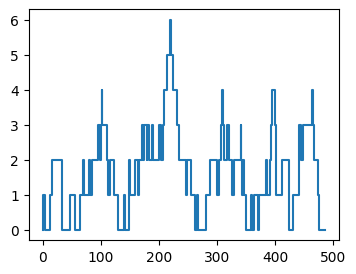

In [4]:
from random import expovariate
import matplotlib.pyplot as plt
def impri(lt):
  n=len(lt)
  if n>0:
    for i in range(n):
      print("%7.4f"%lt[i], " ", end="")
    print("*")
infi=100000
l_l=0.1
tm=20
l_p=1/tm
T=480
t=0
tl=0
ts=expovariate(l_p)
l=0
lt=[]
lx=[]
ly=[]
while min(tl, ts)<T:
  impri(lt)
  if len(lt)>0:
    ts=min(lt)
  else:
    ts=infi
  lx.append(t)
  ly.append(l)
  t=min(tl, ts)
  lx.append(t)
  ly.append(l)
  if t==tl:
    l=l+1
    lt.append(t+expovariate(l_p))
    print("Llegada ", "%10.4f"%tl, "%3d"%l)
    tl=tl+expovariate(l_l)
  else:
    l=l-1
    print("        Salida ", "%10.4f"%t, "%3d"%l)
    k=lt.index(ts)
    lt.pop(k)
plt.figure(figsize=(4,3))
plt.plot(lx, ly)
plt.show()

In [6]:
from random import expovariate
from numba import jit
@jit(nopython=True)
def f(T):
  infi=100000
  l_l=0.1
  tm=20
  l_p=1/tm
  t=0
  tl=0
  ts=expovariate(l_p)
  l=0
  lt=[]
  maxi=0
  while min(tl, ts)<T:
    if len(lt)>0:
      ts=min(lt)
    else:
      ts=infi
    t=min(tl, ts)
    if t==tl:
      l=l+1
      lt.append(t+expovariate(l_p))
      tl=tl+expovariate(l_l)
    else:
      l=l-1
      k=lt.index(ts)
      lt.pop(k)
    if l>maxi:
      maxi=l
  return maxi
nr=100000
l=[]
suma=0
for i in range(nr):
  suma=suma+f(480)
print(suma/nr)

6.00902


In [8]:
from random import expovariate
from numba import jit
@jit(nopython=True)
def f(T):
  infi=100000
  l_l=0.1
  tm=20
  l_p=1/tm
  t=0
  tl=0
  ts=expovariate(l_p)
  l=0
  lt=[]
  maxi=0
  while min(tl, ts)<T:
    if len(lt)>0:
      ts=min(lt)
    else:
      ts=infi
    t=min(tl, ts)
    if t==tl:
      l=l+1
      lt.append(t+expovariate(l_p))
      tl=tl+expovariate(l_l)
    else:
      l=l-1
      k=lt.index(ts)
      lt.pop(k)
    if l>maxi:
      maxi=l
  return maxi
nr=100000
l=[]
for i in range(nr):
  l.append(f(480))
suma=0
for i in range(11):
  suma=suma+l.count(i)/nr
  print("%5d"%i, "%10.5f"%suma, "%10.5f"%(1-suma))


    0    0.00000    1.00000
    1    0.00000    1.00000
    2    0.00000    1.00000
    3    0.00237    0.99763
    4    0.07251    0.92749
    5    0.35610    0.64390
    6    0.69775    0.30225
    7    0.89709    0.10291
    8    0.97186    0.02814
    9    0.99360    0.00640
   10    0.99866    0.00134


9.0


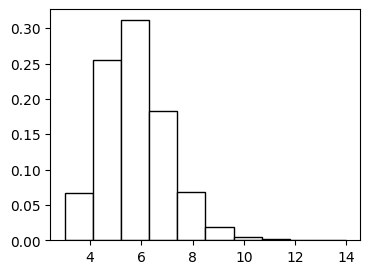

In [11]:
from random import expovariate
import numpy as np
from numba import jit
@jit(nopython=True)
def f(T):
  infi=100000
  l_l=0.1
  tm=20
  l_p=1/tm
  t=0
  tl=0
  ts=expovariate(l_p)
  l=0
  lt=[]
  maxi=0
  while min(tl, ts)<T:
    if len(lt)>0:
      ts=min(lt)
    else:
      ts=infi
    t=min(tl, ts)
    if t==tl:
      l=l+1
      lt.append(t+expovariate(l_p))
      tl=tl+expovariate(l_l)
    else:
      l=l-1
      k=lt.index(ts)
      lt.pop(k)
    if l>maxi:
      maxi=l
  return maxi
nr=100000
l=[]
for i in range(nr):
  l.append(f(480))
print(np.quantile(l, 0.99))
plt.figure(figsize=(4,3))
plt.hist(l, density=1, color="white", edgecolor="black")
plt.show()
